In [30]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
population = pd.read_csv ("C:/Users/Ladin/country_population_v2.csv")

In [45]:
population

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,5.771500e+04,5.805500e+04,...,101220,101353,101453,101669,102053,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05
1,Afghanistan,AFG,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,1.015233e+07,1.037263e+07,...,26616792,27294031,28004331,28803167,29708599,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07
2,Angola,AGO,5.643182e+06,5.753024e+06,5.866061e+06,5.980417e+06,6.093321e+06,6.203299e+06,6.309770e+06,6.414995e+06,...,20997687,21759420,22549547,23369131,24218565,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07,2.881346e+07
3,Albania,ALB,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,1.914573e+06,1.965598e+06,...,2970017,2947314,2927519,2913021,2905195,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06
4,Andorra,AND,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,1.964700e+04,2.075800e+04,...,82683,83861,84462,84449,83751,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04
5,Arab World,ARB,9.249093e+07,9.504450e+07,9.768229e+07,1.004111e+08,1.032399e+08,1.061750e+08,1.092306e+08,1.124069e+08,...,331653797,339825483,348145094,356508908,364895878,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08
6,United Arab Emirates,ARE,9.263400e+04,1.010780e+05,1.124720e+05,1.255660e+05,1.385290e+05,1.503620e+05,1.604810e+05,1.702830e+05,...,6044067,6894278,7666393,8270684,8672475,8.900453e+06,9.006263e+06,9.070867e+06,9.154302e+06,9.269612e+06
7,Argentina,ARG,2.061908e+07,2.095308e+07,2.128768e+07,2.162184e+07,2.195393e+07,2.228339e+07,2.260875e+07,2.293220e+07,...,39970224,40382389,40799407,41223889,41656879,4.209674e+07,4.253992e+07,4.298152e+07,4.341776e+07,4.384743e+07
8,Armenia,ARM,1.874120e+06,1.941491e+06,2.009526e+06,2.077575e+06,2.144998e+06,2.211316e+06,2.276031e+06,2.339124e+06,...,2933056,2908220,2888584,2877311,2875581,2.881922e+06,2.893509e+06,2.906220e+06,2.916950e+06,2.924816e+06
9,American Samoa,ASM,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,2.432100e+04,2.511600e+04,...,57903,57030,56227,55637,55320,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04


In [48]:
population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220,101353,101453,101669,102053,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792,27294031,28004331,28803167,29708599,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687,21759420,22549547,23369131,24218565,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017,2947314,2927519,2913021,2905195,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683,83861,84462,84449,83751,82431.0,80788.0,79223.0,78014.0,77281.0


In [40]:
fertility = pd.read_csv ("C:/Users/Ladin/fertility_rate_v2.csv")

In [41]:
fertility

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,...,1.763000,1.764000,1.769000,1.776000,1.783000,1.791000,1.796000,1.800000,1.801000,1.800000
1,Afghanistan,AFG,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,...,6.460000,6.254000,6.038000,5.816000,5.595000,5.380000,5.174000,4.981000,4.802000,4.635000
2,Angola,AGO,7.478000,7.524000,7.563000,7.592000,7.611000,7.619000,7.618000,7.613000,...,6.368000,6.307000,6.238000,6.162000,6.082000,6.000000,5.920000,5.841000,5.766000,5.694000
3,Albania,ALB,6.489000,6.401000,6.282000,6.133000,5.960000,5.773000,5.581000,5.394000,...,1.668000,1.650000,1.646000,1.653000,1.668000,1.685000,1.700000,1.710000,1.714000,1.713000
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180000,1.250000,1.190000,1.270000,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,6.948747,6.971370,6.992350,7.009265,7.020105,7.023159,7.015824,6.998628,...,3.476805,3.470126,3.469736,3.471666,3.470003,3.461347,3.442829,3.413299,3.373840,3.326532
6,United Arab Emirates,ARE,6.929000,6.910000,6.892000,6.875000,6.857000,6.838000,6.817000,6.791000,...,2.005000,1.949000,1.904000,1.869000,1.841000,1.820000,1.801000,1.783000,1.765000,1.748000
7,Argentina,ARG,3.109000,3.100000,3.089000,3.078000,3.068000,3.058000,3.051000,3.048000,...,2.413000,2.396000,2.382000,2.370000,2.358000,2.347000,2.335000,2.322000,2.308000,2.293000
8,Armenia,ARM,4.786000,4.670000,4.521000,4.345000,4.150000,3.950000,3.758000,3.582000,...,1.702000,1.706000,1.703000,1.693000,1.680000,1.664000,1.648000,1.634000,1.622000,1.612000
9,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
life = pd.read_csv ("C:/Users/Ladin/life_expectancy_v2.csv")

In [43]:
life

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,...,74.576000,74.725000,74.872000,75.016000,75.158000,75.299000,75.440000,75.582000,75.725000,75.867000
1,Afghanistan,AFG,32.292000,32.742000,33.185000,33.624000,34.060000,34.495000,34.928000,35.361000,...,59.694000,60.243000,60.754000,61.226000,61.666000,62.086000,62.494000,62.895000,63.288000,63.673000
2,Angola,AGO,33.251000,33.573000,33.914000,34.272000,34.645000,35.031000,35.426000,35.828000,...,55.096000,56.189000,57.231000,58.192000,59.042000,59.770000,60.373000,60.858000,61.241000,61.547000
3,Albania,ALB,62.279000,63.298000,64.187000,64.911000,65.461000,65.848000,66.108000,66.302000,...,75.656000,75.943000,76.281000,76.652000,77.031000,77.389000,77.702000,77.963000,78.174000,78.345000
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,46.825065,47.407699,47.988878,48.572229,49.159167,49.744338,50.319000,50.876461,...,69.424552,69.646970,69.851434,70.041054,70.223894,70.408016,70.598298,70.793957,70.994541,71.198456
6,United Arab Emirates,ARE,52.265000,53.312000,54.349000,55.375000,56.385000,57.374000,58.330000,59.248000,...,75.828000,76.012000,76.183000,76.344000,76.498000,76.648000,76.798000,76.948000,77.101000,77.256000
7,Argentina,ARG,65.022000,65.141000,65.233000,65.311000,65.388000,65.481000,65.603000,65.760000,...,75.105000,75.268000,75.431000,75.595000,75.761000,75.926000,76.089000,76.252000,76.415000,76.577000
8,Armenia,ARM,65.971000,66.402000,66.837000,67.276000,67.715000,68.152000,68.587000,69.015000,...,72.815000,72.946000,73.119000,73.331000,73.571000,73.814000,74.044000,74.255000,74.445000,74.618000
9,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
%matplotlib inline
population.plot(kind = "scatter", x = "Fertility_rate", y="Population")

In [15]:
x_pred = data[["Fertility_rate", "Life_expectancy"]]
y = data["Population"]

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(x_pred,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
lm.intercept_

-3571109227.0684233

In [19]:
lm.coef_

array([-4.71649007e+08,  1.61801553e+08])

In [20]:
lm.score(x_pred, y)

0.9580558551305863

In [21]:
lm.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

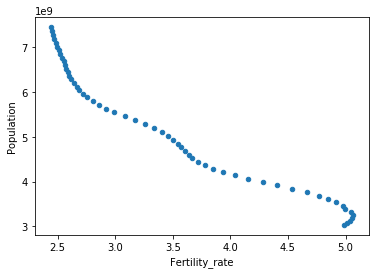

In [22]:
%matplotlib inline
data.plot(kind = "scatter", x = "Fertility_rate", y="Population")